<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('/content/sample_data/train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.shape

(5282, 20)

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Проверка на наличие пропусков в данных.

In [ ]:
isna_info = pd.DataFrame(data.isna().sum())
isna_info.columns = ['nan_count']
isna_info

,nan_count
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Проверка на наличие дубликатов.

In [ ]:
data.duplicated().sum()

14

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Проверка численных типов.


In [ ]:
for col in num_cols:
  print(data[col].dtype)

int64
float64
object


Приведение типа object к типу float.

In [ ]:
data[num_cols[-1]] = pd.to_numeric(data[num_cols[-1]], downcast='float', errors='coerce')
data[num_cols[-1]]

0       1026.349976
1       1872.199951
2         75.900002
3       2570.000000
4       6758.450195
           ...     
5277      82.150002
5278    2188.449951
5279      55.049999
5280    2215.250000
5281    1375.599976
Name: TotalSpent, Length: 5282, dtype: float32

In [ ]:
data.TotalSpent.isna().sum()

9

Некоторые значения не удалось преобразовать к float, из-за чего появились пустые значения.

In [ ]:
data = data.dropna(subset=['TotalSpent'])
data.TotalSpent.isna().sum()

0

Построение диаграмм для численных признаков.

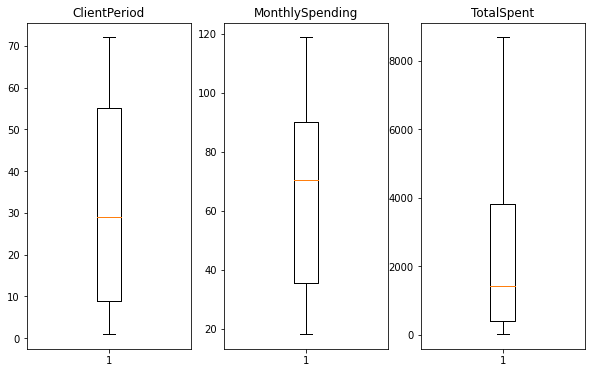

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

for idx, col in enumerate(num_cols):
  plt.subplot(1, 3, idx + 1)
  plt.boxplot(data[col])
  plt.title(col)
plt.show()

Вывод информации о значениях категориальных признаков.

In [ ]:
for col in cat_cols:
   print(data[col].value_counts())
   print() 

Male      2651
Female    2622
Name: Sex, dtype: int64

0    4431
1     842
Name: IsSeniorCitizen, dtype: int64

No     2704
Yes    2569
Name: HasPartner, dtype: int64

No     3676
Yes    1597
Name: HasChild, dtype: int64

Yes    4754
No      519
Name: HasPhoneService, dtype: int64

No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64

No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64

No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64

No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64

No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess, dtype: in

Построение диаграмм для категориальных признаков.

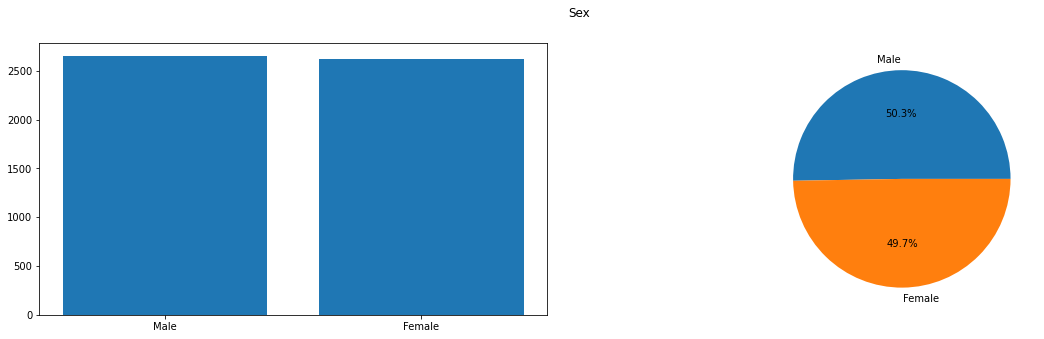

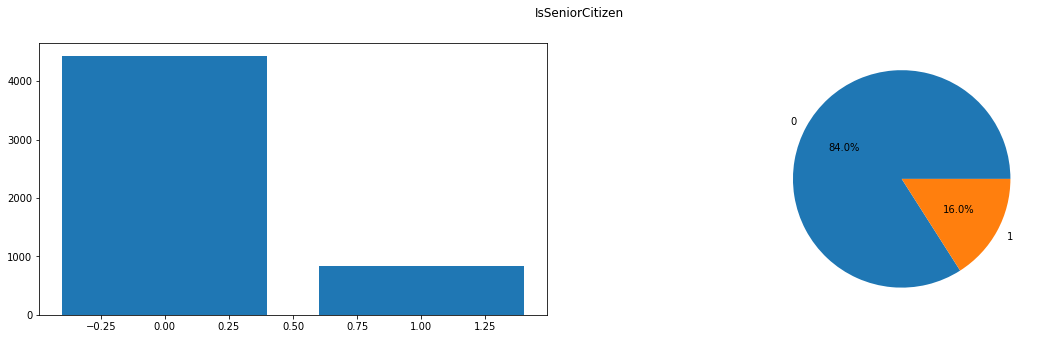

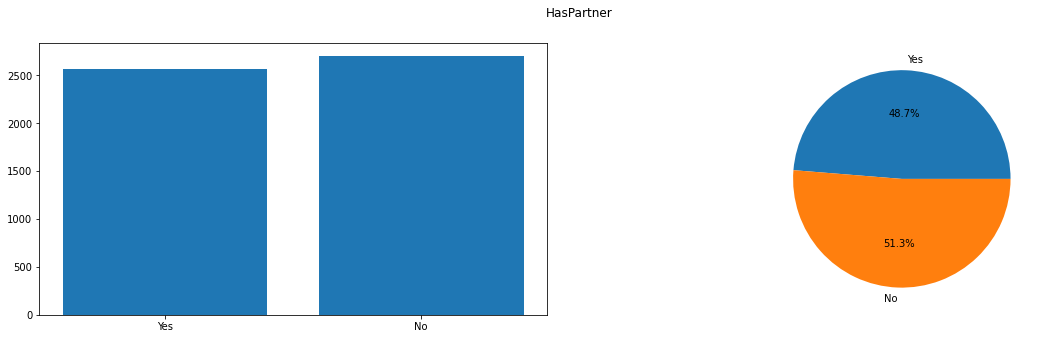

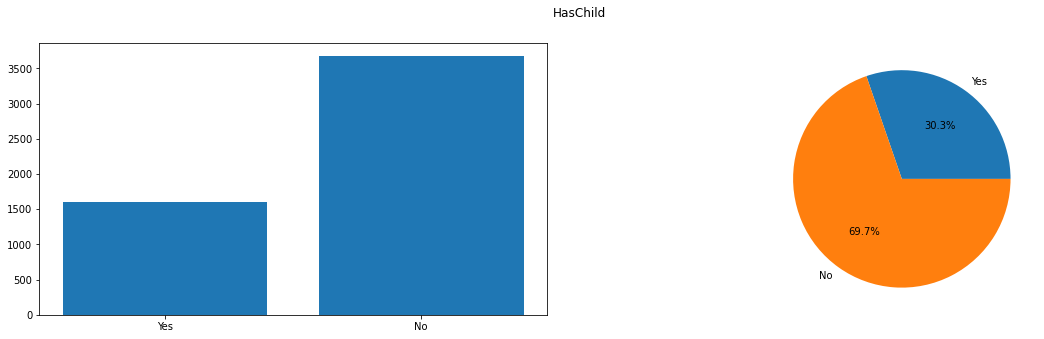

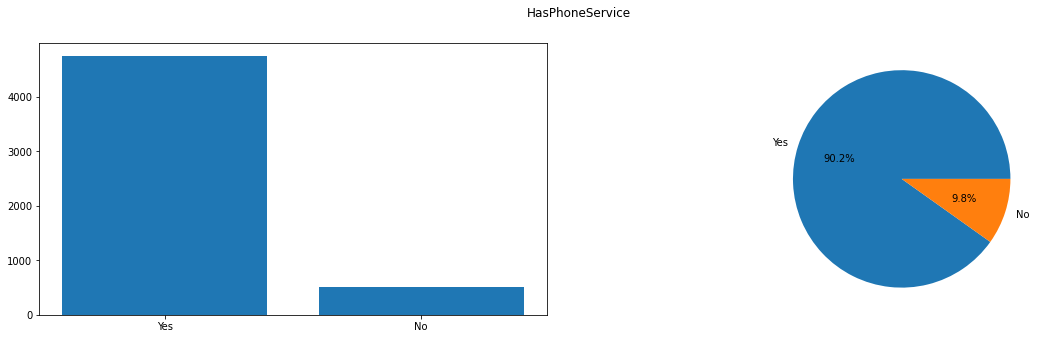

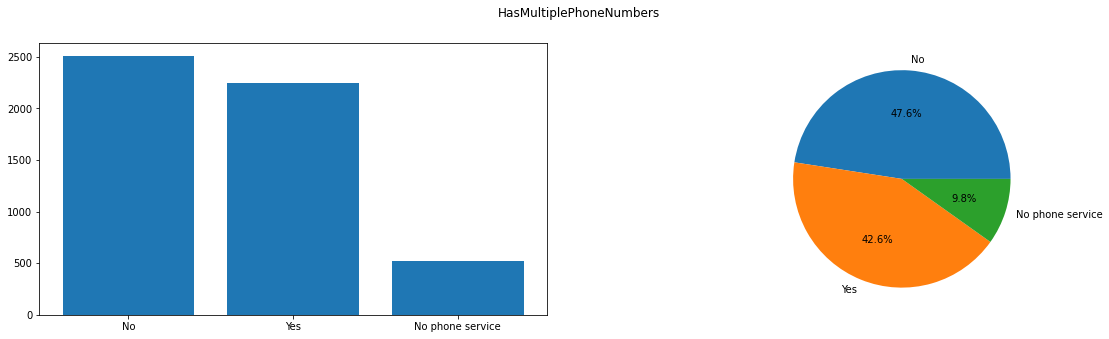

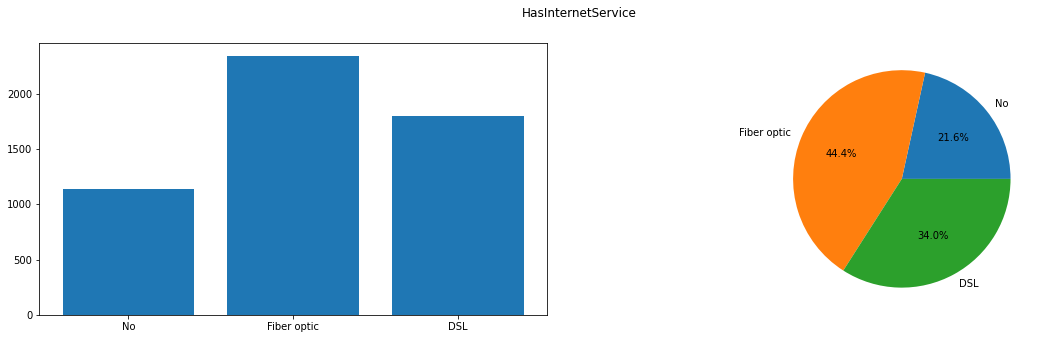

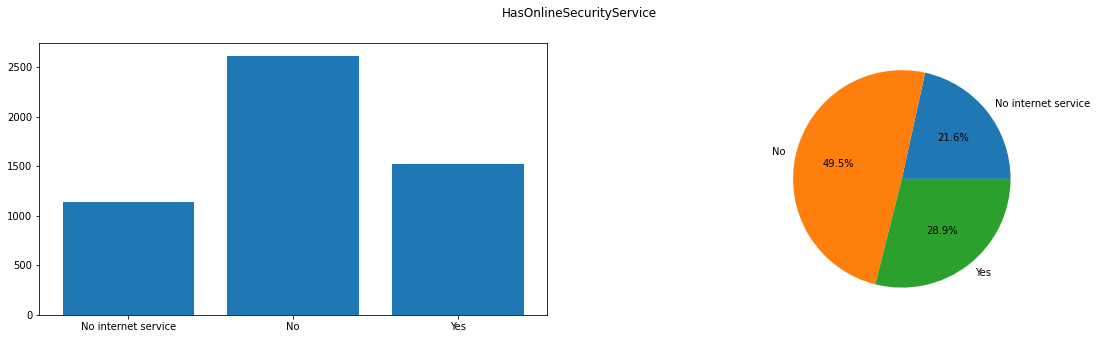

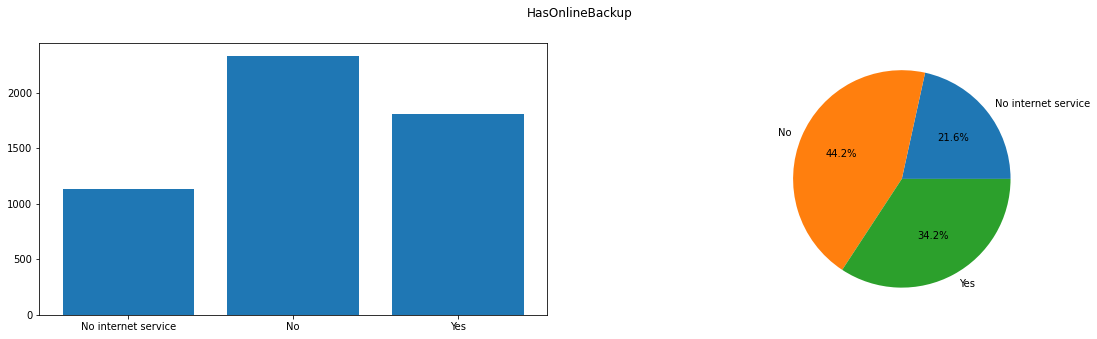

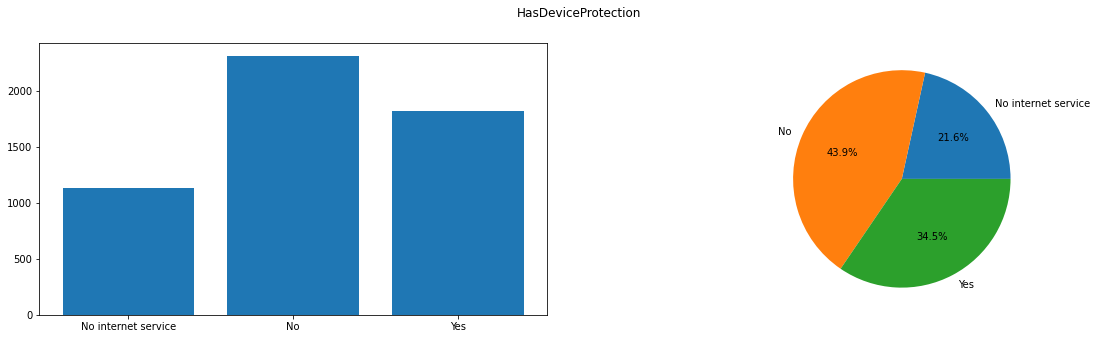

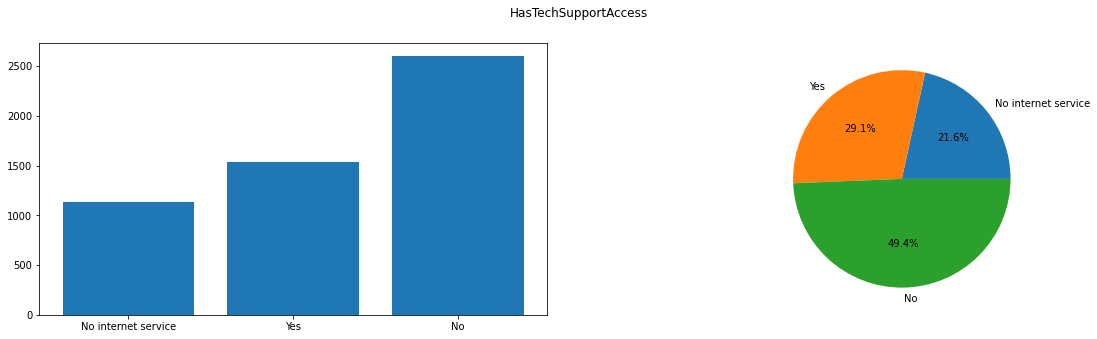

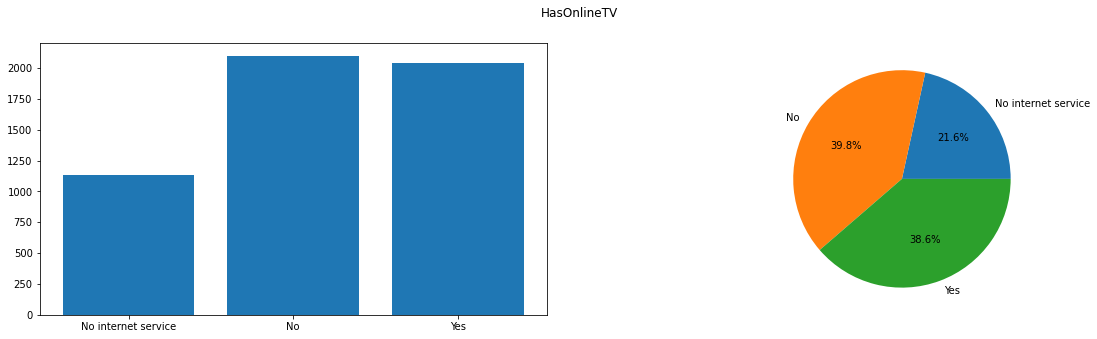

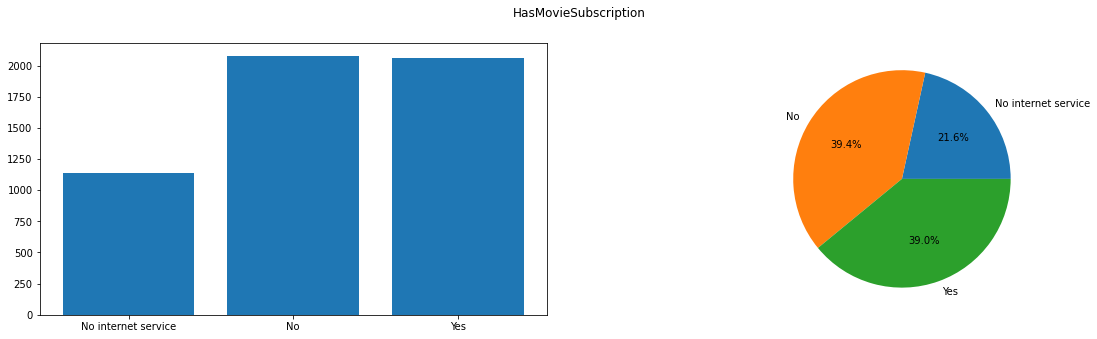

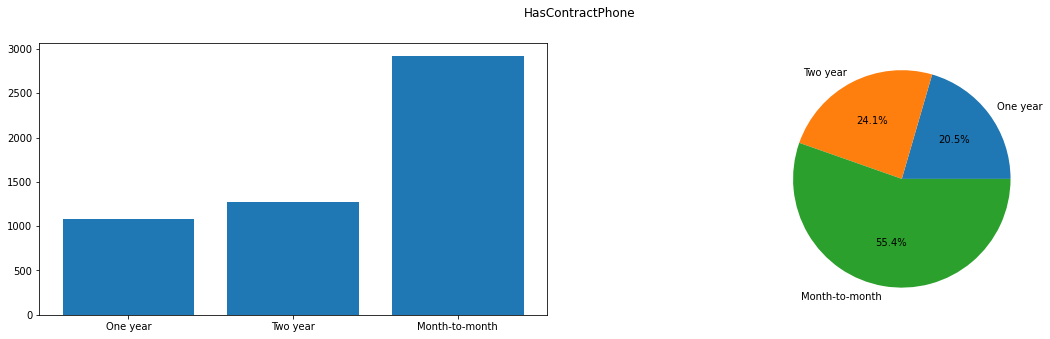

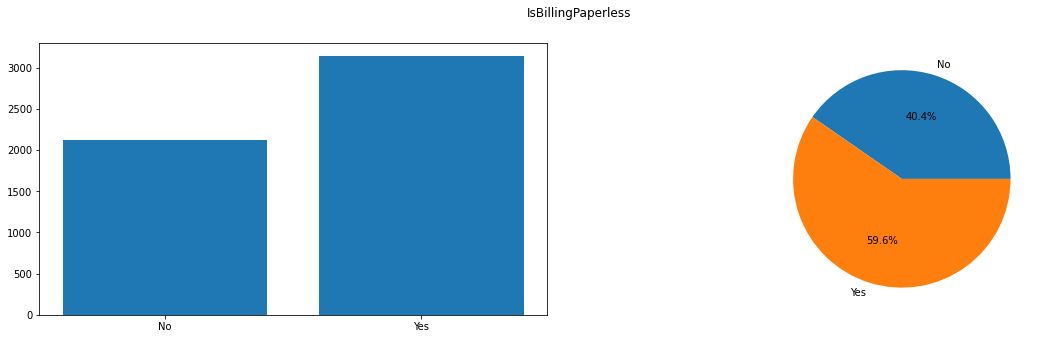

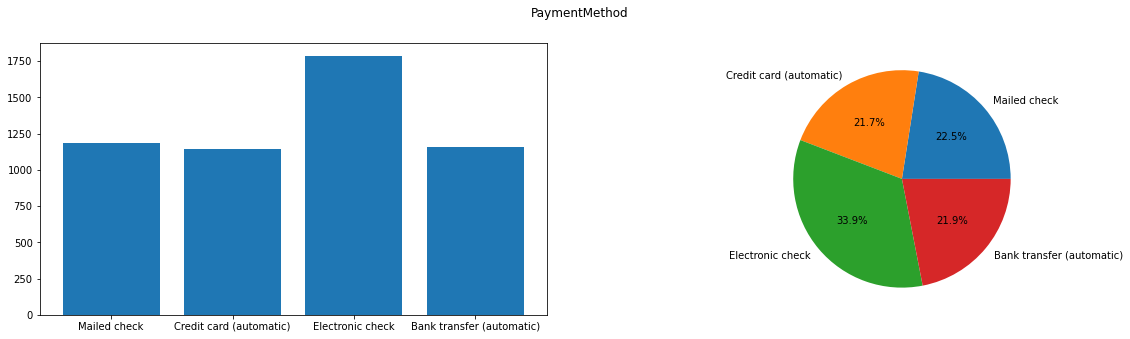

In [ ]:
for idx, col in enumerate(cat_cols):
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))
  
  x = data[col].unique()
  y = [data[data[col] == value][col].count() for value in x]

  axs[0].bar(x, y)
  p, tx, autotexts = axs[1].pie(y, labels=x, autopct='')

  z = np.array(y)
  for i, a in enumerate(autotexts):
    a.set_text("{}%".format(round((z[i]*100)/z.sum(), 1)))
  
  fig.suptitle(col)
  plt.show()


In [ ]:
data[target_col].value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

Классы целевой переменной незначительно несбалансированы (объектов класса 0 в 3 раза больше объектов класса 1).

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Преобразование категориальных признаков.

In [ ]:
dummy_features = pd.get_dummies(data[cat_cols])
dummy_data = pd.concat([data[num_cols], dummy_features], axis=1)
dummy_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.349976,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.199951,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.900002,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.000000,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.450195,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


Нормирование численных признаков

In [ ]:
scaler = StandardScaler()
scalered_data = scaler.fit_transform(dummy_data)

Разделение на train и test выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scalered_data, data[target_col], 
                                                    train_size=0.8,
                                                    random_state=42)

Подбор параметров и обучение модели LogisticRegressionCV

In [ ]:
clf = LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True)
clf.fit(X_train, y_train)
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)>

In [ ]:
train_score_logreg = clf.score(X_train, y_train)
test_score_logreg = clf.score(X_test, y_test)
train_score_logreg, test_score_logreg

(0.848588702144255, 0.8446315241072274)

Подбор параметров и обучение модели с помощью GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], 
                                                    train_size=0.8,
                                                    random_state=42)
preproc = ColumnTransformer(transformers=[('cat_transform', OneHotEncoder(), cat_cols),
                                               ('num_transform', StandardScaler(), num_cols)])
clf = LogisticRegression()
pipeline = Pipeline(steps=[('preprocessor', preproc),
                          ('classifier', clf)])
params = {'classifier__C': [100., 10., 1., 0.1, 0.01, 0.001]}
grid_cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='roc_auc', refit=True)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat_transform',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                             

In [ ]:
train_score_grid_cv = grid_cv.score(X_train, y_train)
test_score_grid_cv = grid_cv.score(X_test, y_test)
train_score_grid_cv, test_score_grid_cv

(0.848323063935322, 0.8448067632850242)

GridSearchCV показал лучший результат с разницей, равной:


In [ ]:
test_score_grid_cv - test_score_logreg

0.00017523917779682652

и параметрами:

In [ ]:
grid_cv.best_params_

{'classifier__C': 1.0}

Результат:

train_score: 0.8497509728571693

test_score: 0.843868836989856


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], 
                                                    train_size=0.8,
                                                    random_state=42)

Создание и обучение модели с параметрами по умолчанию.

In [ ]:
boost_model = CatBoostClassifier(cat_features=cat_cols)
boost_model.fit(X_train, y_train)

Learning rate set to 0.019027
0:	learn: 0.6804678	total: 23.9ms	remaining: 23.9s
1:	learn: 0.6688765	total: 54.1ms	remaining: 27s
2:	learn: 0.6578156	total: 65.4ms	remaining: 21.7s
3:	learn: 0.6468362	total: 79.3ms	remaining: 19.7s
4:	learn: 0.6364970	total: 92.8ms	remaining: 18.5s
5:	learn: 0.6262660	total: 111ms	remaining: 18.4s
6:	learn: 0.6173050	total: 123ms	remaining: 17.5s
7:	learn: 0.6085275	total: 136ms	remaining: 16.9s
8:	learn: 0.5997095	total: 149ms	remaining: 16.4s
9:	learn: 0.5922119	total: 160ms	remaining: 15.8s
10:	learn: 0.5856003	total: 170ms	remaining: 15.3s
11:	learn: 0.5783171	total: 181ms	remaining: 14.9s
12:	learn: 0.5726734	total: 186ms	remaining: 14.1s
13:	learn: 0.5659778	total: 199ms	remaining: 14s
14:	learn: 0.5597141	total: 213ms	remaining: 14s
15:	learn: 0.5538124	total: 222ms	remaining: 13.6s
16:	learn: 0.5484547	total: 232ms	remaining: 13.4s
17:	learn: 0.5434517	total: 242ms	remaining: 13.2s
18:	learn: 0.5376512	total: 254ms	remaining: 13.1s
19:	learn: 0

Оценка качества модели.

In [ ]:
train_boost_predicted = boost_model.predict_proba(X_train)[:, 1]
test_boost_predicted = boost_model.predict_proba(X_test)[:, 1]
train_boost_score = roc_auc_score(y_train, train_boost_predicted)
test_boost_score = roc_auc_score(y_test, test_boost_predicted)
train_boost_score, test_boost_score

(0.9021631123690492, 0.836530264279625)

In [ ]:
Создание новой модели и подбор параметров с помощью GridSearchCV.

In [ ]:
params = {'n_estimators': range(200, 400, 50),
          'learning_rate': [0.001, 0.01, 0.1],
          'depth': range(1, 5)}
boost_grid = GridSearchCV(CatBoostClassifier(cat_features=cat_cols), 
                          param_grid=params, cv=5, scoring='roc_auc', refit=True)
boost_grid.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.6434527	total: 8.9ms	remaining: 1.77s
1:	learn: 0.6028402	total: 17ms	remaining: 1.68s
2:	learn: 0.5724731	total: 24.1ms	remaining: 1.58s
3:	learn: 0.5466022	total: 30.5ms	remaining: 1.5s
4:	learn: 0.5203740	total: 37.9ms	remaining: 1.48s
5:	learn: 0.5024240	total: 47.5ms	remaining: 1.53s
6:	learn: 0.4877673	total: 53.8ms	remaining: 1.48s
7:	learn: 0.4769706	total: 62.5ms	remaining: 1.5s
8:	learn: 0.4685323	total: 69.1ms	remaining: 1.47s
9:	learn: 0.4598301	total: 75.9ms	remaining: 1.44s
10:	learn: 0.4537922	total: 82.9ms	remaining: 1.42s
11:	learn: 0.4501377	total: 86.1ms	remaining: 1.35s
12:	learn: 0.4454092	total: 92.8ms	remaining: 1.33s
13:	learn: 0.4410963	total: 99.5ms	remaining: 1.32s
14:	learn: 0.4372304	total: 107ms	remaining: 1.32s
15:	learn: 0.4346644	total: 114ms	remaining: 1.31s
16:	learn: 0.4319233	total: 119ms	remaining: 1.28s
17:	learn: 0.4300756	total: 126ms	remaining: 1.28s
18:	learn: 0.42

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fe852a8d950>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': range(1, 5),
                         'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': range(200, 400, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Оценка качества модели.

In [ ]:
train_boost_grid_predicted = boost_grid.predict_proba(X_train)[:, 1]
test_boost_grid_predicted = boost_grid.predict_proba(X_test)[:, 1]
train_boost_grid_score = roc_auc_score(y_train, train_boost_grid_predicted)
test_boost_grid_score = roc_auc_score(y_test, test_boost_grid_predicted)
train_boost_grid_score, test_boost_grid_score

(0.85569510805345, 0.8440679170218812)

In [ ]:
boost_grid.best_params_

{'depth': 1, 'learning_rate': 0.1, 'n_estimators': 300}

In [ ]:
test_boost_grid_score - test_boost_score

0.007537652742256262

Лучший результат:

In [ ]:
boost_grid.best_score_

0.8483761600443394

# Предсказания

In [ ]:
best_model = boost_grid

In [ ]:
X_test = pd.read_csv('/content/sample_data/test.csv')
submission = pd.read_csv('/content/sample_data/submission.csv')

Подготовка тестовых данных.

In [ ]:
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], downcast='float', errors='coerce')

In [ ]:
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('/content/sample_data/my_submission.csv', index=False)

# Kaggle (5 баллов)

[задание на kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021)

Меня можно найти в таблице рейтинга: Kartasheva Ekaterina

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.